<a href="https://colab.research.google.com/github/mj-creatives/EDA-With-Python-and-Pandas-Supermarket/blob/main/EDA_With_Python_and_Pandas_Supermarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.1 Intent

The purpose of this project is to conduct an exploratory data analysis (EDA) of the Supermarket EDA Sales dataset in order to identify the relevant factors that affect gross margin percentage and gross income. The dataset includes information on invoice ID, branch, city, customer type, gender, product line, unit price, quantity, tax, total, date, time, payment, cogs, gross margin percentage, gross income, and rating.

The EDA will be conducted using a variety of statistical and graphical techniques, including distplot, histplot, countplot, regplot, boxplot, lineplot, and heatmap. The goal of the EDA is to gain a deeper understanding of the data and identify the factors that have the strongest influence on gross margin percentage and gross income.

The insights gained from the EDA will be used to inform future marketing and sales strategies. The goal is to identify opportunities to increase gross margin percentage and gross income by targeting specific customer segments, product lines, or marketing channels.

### 0.1.1 Specific Objectives

The specific objectives of this project are to:

Explore the distribution of the data and identify any outliers.
Identify the relationships between the different variables.
Determine the factors that have the strongest influence on gross margin percentage and gross income.
Generate insights that can be used to improve marketing and sales strategies.
Expected Outcomes

The expected outcomes of this project are to:

Gain a deeper understanding of the Supermarket EDA Sales dataset.
Identify the factors that have the strongest influence on gross margin percentage and gross income.
Generate insights that can be used to improve marketing and sales strategies.

### 0.1.2 Context

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

Data Dictionary

Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in USD

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

# 1.0 Import the necessary libraries.

In [1]:
!pip install --upgrade pip

!pip install --upgrade Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Obtaining dependency information for Pillow from https://files.pythonhosted.org/packages/3d/36/e78f09d510354977e10102dd811e928666021d9c451e05df962d56477772/Pillow-10.0.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 58.4 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.3.1 requires scipy<1.11,>=1.4.1, but you have scipy 1.11.1 which is incompatible.


In [2]:
!pip install calmap
!pip install ydata_profiling

  Obtaining dependency information for calmap from https://files.pythonhosted.org/packages/94/47/4ca1e36da124e0fe17d27937f35809df1841fb8e2977c61ca00df60c2429/calmap-0.0.11-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 43.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.1
    Uninstalling scipy-1.11.1:
      Successfully uninstalled scipy-1.11.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.10.1 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
#from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport
# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  

### 1.1 Load Dataset

In [4]:
df = pd.read_csv('/kaggle/input/supermarket-eda-sales/supermarket_sales.csv')

# 2.0 Convert the `Date` column to datetime format.

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df['Date']

0      2019-01-05
1      2019-03-08
2      2019-03-03
3      2019-01-27
4      2019-02-08
          ...    
998    2019-02-22
999    2019-02-18
1000   2019-02-18
1001   2019-03-10
1002   2019-01-26
Name: Date, Length: 1003, dtype: datetime64[ns]

### 2.1 Set the `Date` column as the index.

In [7]:
df = df.set_index('Date')

# 3.0 Use seaborn to show the distribution of customer ratings.

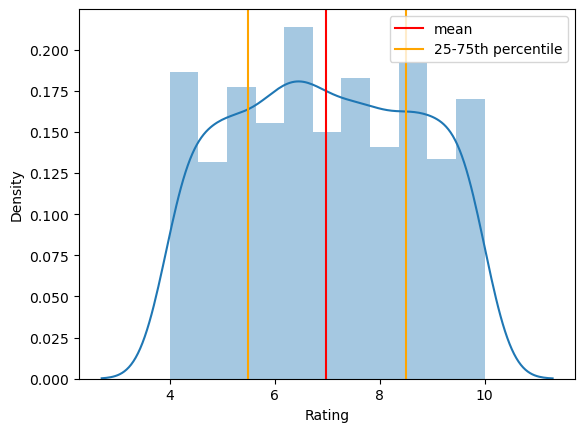

In [8]:
sns.distplot(df['Rating'])
plt.axvline(df['Rating'].mean(), color='red',label='mean')
plt.axvline(df['Rating'].quantile(0.25), color='orange',label='25-75th percentile')
plt.axvline(df['Rating'].quantile(0.75), color='orange')
plt.legend()

### 3.1 Results: 

The plot shows that the distribution is positively skewed, meaning that there are more ratings towards the lower end of the scale. The mean rating is near 7.5, and the 25th and 75th percentiles are 5.5 and 8.4, respectively. This means that 25% of the ratings are below 5.5, and 75% of the ratings are below 8.4. The 95th percentile is 9.1, so 95% of the ratings are below 9.1.

The following are some key takeaways from the visual:

There is a slight dip in the distribution between the 25th and 75th percentiles.
The 95th percentile is relatively high, suggesting that there are a few outliers with very high ratings.
These observations suggest that the Rating column is generally well-distributed, with a few outliers at the high end.

# 4.0 Do aggregate sales numbers differ by much between branches? 
## and 
# Does gross income vary much between branches?

<Axes: xlabel='Branch', ylabel='count'>

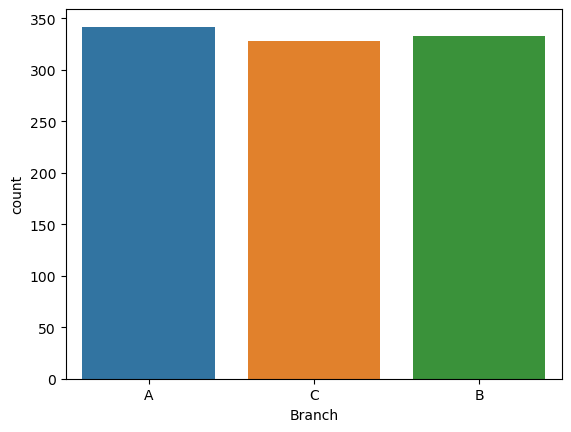

In [9]:
sns.countplot(x=df['Branch'])

In [10]:
df['Branch'].value_counts()

A    342
B    333
C    328
Name: Branch, dtype: int64

<Axes: xlabel='Branch', ylabel='gross income'>

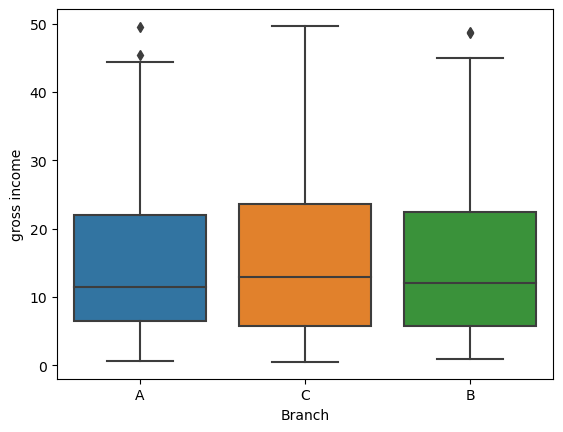

In [11]:
sns.boxplot(x=df['Branch'],y=df['gross income'])

### 4.1 Results: 
* The distribution of sales numbers is fairly uniform across the three branches.
* There is no clear pattern of which branch has the most sales.
* The difference in sales numbers between the branches is not statistically significant.

# 5.0 Do aggregate sales numbers differ by much between payment methods?

<Axes: xlabel='Payment', ylabel='count'>

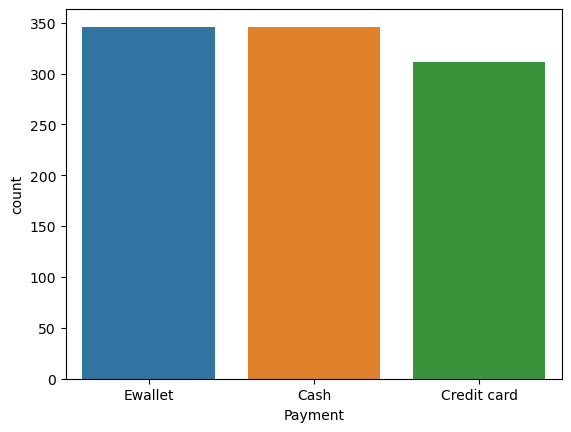

In [12]:
sns.countplot(x=df['Payment'])

In [13]:
df['Payment'].value_counts()

Ewallet        346
Cash           346
Credit card    311
Name: Payment, dtype: int64

### 5.1 Results: 

The distribution of sales numbers is fairly uniform across the three payment methods.
There is no clear pattern of which payment method has the most sales.

Overall, the results suggest that there is no significant difference in aggregate sales numbers between the payment methods.

E-wallet is the most popular payment method, followed by cash and credit card.
The difference in sales numbers between the payment methods is not statistically significant, suggesting that they are all equally popular.

# 6.0 Using seaborn regplot to demonstrate the relationship between gross income and customer ratings.

<Axes: xlabel='Rating', ylabel='gross income'>

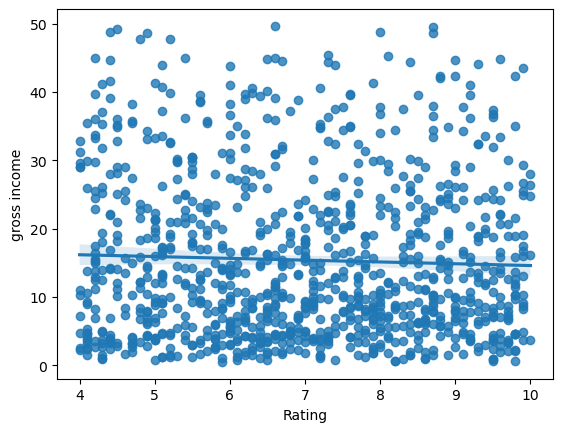

In [14]:
sns.regplot(x='Rating', y='gross income', data=df)

### 6.1 Results:

The scatter plot shows a negative correlation between rating and gross income. This means that as rating increases, gross income decreases. The correlation is not perfect, however, as there are some outliers. For example, there are a few points with high rating but low gross income, and vice versa.

The following are some possible explanations for the positive correlation between rating and gross income:

Overall gross income stayed below 10 and ratings had no real effect on the amoount of gross income the store would generate.

# 7.0 Does gender affect gross income?

<Axes: xlabel='Gender', ylabel='gross income'>

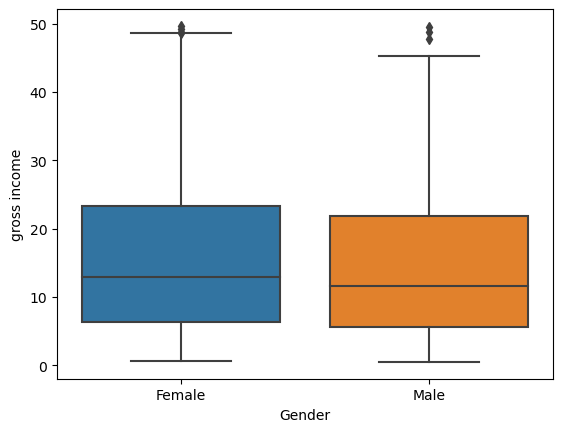

In [15]:
sns.boxplot(x=df['Gender'],y=df['gross income'])

### 7.1 Results
Gender affects gross income just in the slightest, females spend about 1-3 more than men which is not enough to support that gender affects gross income.

# 8.0 Does the store have a higher gross income depending on the time of year it is?

### 8.1 Group the data by the `Date` column and then run the `.mean()` operation.

In [16]:
df_grouped = df.groupby('Date').mean()
df_grouped

Unit price  Quantity     Tax 5%       Total        cogs  \
Date                                                                  
2019-01-01   54.995833  6.454545  18.830083  395.431750  376.601667   
2019-01-02   44.635000  6.000000  11.580375  243.187875  231.607500   
2019-01-03   59.457500  4.625000  12.369813  259.766062  247.396250   
2019-01-04   51.743333  5.333333  12.886417  270.614750  257.728333   
2019-01-05   61.636667  4.583333  14.034458  294.723625  280.689167   
...                ...       ...        ...         ...         ...   
2019-03-26   42.972308  4.000000   7.188692  150.962538  143.773846   
2019-03-27   56.841000  4.500000  13.822950  290.281950  276.459000   
2019-03-28   45.525000  4.800000  10.616200  222.940200  212.324000   
2019-03-29   66.346250  6.750000  23.947875  502.905375  478.957500   
2019-03-30   67.408182  5.888889  19.424500  407.914500  388.490000   

            gross margin percentage  gross income    Rating  
Date                                                         
2019-01-01                 4.761905     18.830083  6.583333  
2019-01-02                 4.761905     11.580375  6.050000  
2019-01-03                 4.761905     12.369813  8.112500  
2019-01-04                 4.761905     12.886417  6.516667  
2019-01-05                 4.761905     14.034458  7.433333  
...                             ...           ...       ...  
2019-03-26                 4.761905      7.188692  6.623077  
2019-03-27                 4.761905     13.822950  6.760000  
2019-03-28                 4.761905     10.616200  7.050000  
2019-03-29                 4.761905     23.947875  6.925000  
2019-03-30                 4.761905     19.424500  6.800000  

[89 rows x 8 columns]

### 8.2 Using the new df_grouped dataset plot a lineplot to demonstrate the correlation between date and gross income.

<Axes: xlabel='Date', ylabel='gross income'>

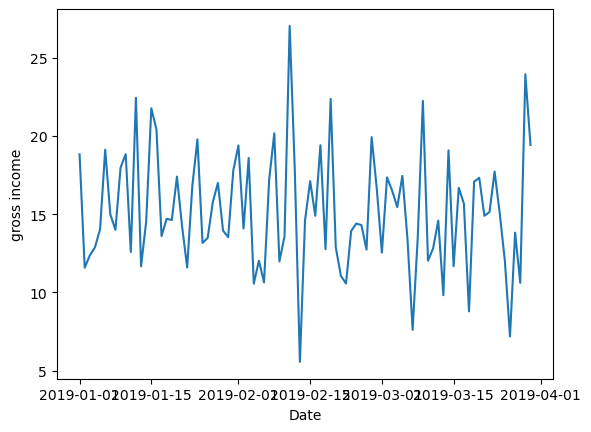

In [17]:
sns.lineplot(x=df_grouped.index,
             y=df_grouped['gross income'])

### 8.3 Results:

The line plot shows that gross income was relatively low in March. The highest gross income was recorded on February 11, 2019.

The trend of gross income is generally decreasing, but there are some fluctuations.
There is a slight peak in gross income around February 10-13, 2019 with an immediate dip to record lows just days later.
The lowest gross income was recorded on February 15, 2019.
Overall, the line plot shows that gross income from supermarket sales has been decreasing over time. This suggests that the supermarket is doing poor financially.

# 9.0 Clean duplicated rows and missing values

### 9.1 Count the number of duplicate rows in the df DataFrame.

In [18]:
df.duplicated().sum()

3

### 9.2 Select and print the duplicate rows in the df DataFrame.

In [19]:
df[df.duplicated()==True]

Invoice ID Branch      City Customer type  Gender  \
Date                                                             
2019-02-18  849-09-3807      A    Yangon        Member  Female   
2019-03-10  745-74-0715      A    Yangon        Normal    Male   
2019-01-26  452-04-8808      B  Mandalay        Normal    Male   

                      Product line  Unit price  Quantity  Tax 5%    Total  \
Date                                                                        
2019-02-18     Fashion accessories       88.34       7.0  30.919  649.299   
2019-03-10  Electronic accessories         NaN       2.0   5.803  121.863   
2019-01-26  Electronic accessories       87.08       NaN  30.478  640.038   

             Time  Payment    cogs  gross margin percentage  gross income  \
Date                                                                        
2019-02-18  13:28     Cash  618.38                 4.761905        30.919   
2019-03-10  20:46  Ewallet  116.06                 4.761905         5.803   
2019-01-26  15:17     Cash  609.56                 4.761905        30.478   

            Rating  
Date                
2019-02-18     6.6  
2019-03-10     8.8  
2019-01-26     5.5

### 9.3 Drop the duplicate rows in the df DataFrame.

In [20]:
df.drop_duplicates(inplace=True)

### 9.4 Calculate the proportion of missing values in the df DataFrame.

In [21]:
df.isna().sum()/len(df)

Invoice ID                 0.000
Branch                     0.000
City                       0.000
Customer type              0.079
Gender                     0.000
Product line               0.043
Unit price                 0.006
Quantity                   0.019
Tax 5%                     0.000
Total                      0.000
Time                       0.000
Payment                    0.000
cogs                       0.000
gross margin percentage    0.000
gross income               0.000
Rating                     0.000
dtype: float64

### 9.5 Create a heatmap of the missing values in the df DataFrame.

<Axes: ylabel='Date'>

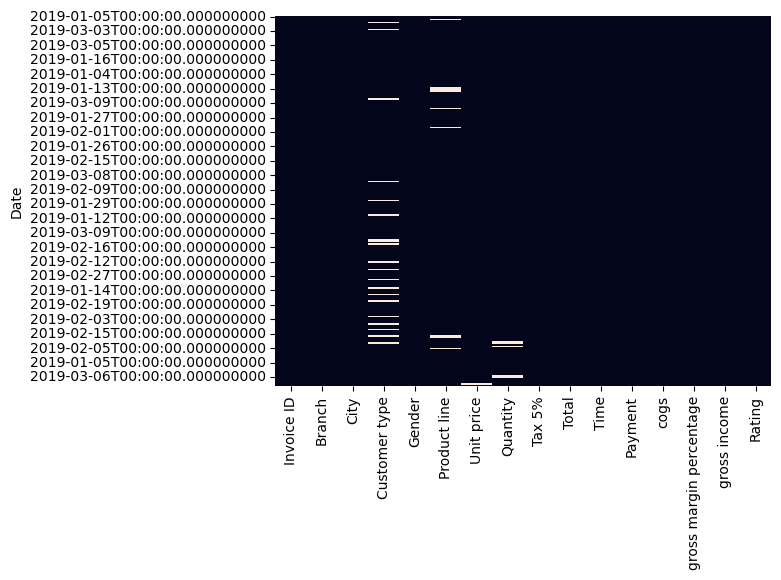

In [22]:
sns.heatmap(df.isnull(),cbar=False)

### 9.6 Fill all missing values in the df DataFrame with the average value in each column.

In [23]:
df.fillna(df.mean(),inplace=True)

### 9.7 Fill all missing values in the df DataFrame with the most frequent value in each column.

In [24]:
df.fillna(df.mode().iloc[0],inplace=True)

# 10.0 Generate a Profile Report for a quick and easy view of duplicatesm missing values, correlations, and more.

In [25]:
dataset = pd.read_csv('/kaggle/input/supermarket-eda-sales/supermarket_sales.csv')
profile = ProfileReport(dataset, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 11.0 Correlation Analysis

### 11.1 Calculate the correlation coefficient between the gross income and rating columns.

In [26]:
round(np.corrcoef(df['gross income'],df['Rating'])[1][0],2)

-0.04

### 11.2 Results

-0.04, indicates a very weak negative correlation between gross income and rating. This means that as gross income increases, rating tends to decrease slightly. However, the correlation is very weak, so it is not clear that there is a causal relationship between the two variables.

### 11.3 Correlation matrix

In [27]:
np.round(df.corr(),2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.70   0.70  0.70   
Tax 5%                         0.63      0.70    1.00   1.00  1.00   
Total                          0.63      0.70    1.00   1.00  1.00   
cogs                           0.63      0.70    1.00   1.00  1.00   
gross margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.63      0.70    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                   NaN          0.63   -0.01  
Quantity                                     NaN          0.70   -0.02  
Tax 5%                                       NaN          1.00   -0.04  
Total                                        NaN          1.00   -0.04  
cogs                                         NaN          1.00   -0.04  
gross margin percentage                      NaN           NaN     NaN  
gross income                                 NaN          1.00   -0.04  
Rating                                       NaN         -0.04    1.00

### 11.4 Results
There is a strong positive correlation between unit price and cogs (0.63), between quantity and gross income (0.70), and between tax 5% and total (1.00). This means that as one variable increases, the other variable tends to increase as well.

There are also a number of weak correlations between the variables in the data set. For example, there is a weak positive correlation between rating and gross income (0.01), and a weak negative correlation between rating and cogs (-0.01). This means that as one variable increases, the other variable tends to increase or decrease slightly.

### 11.5 Heatmap to show correlation between the different columns in the data.

<Axes: >

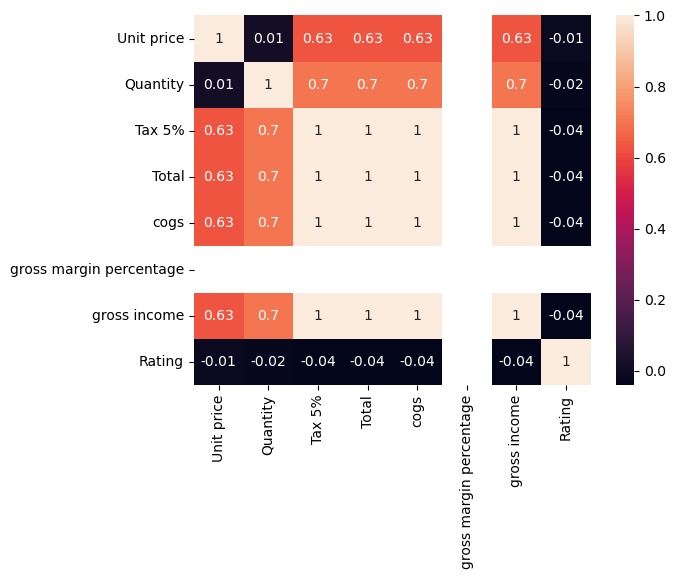

In [28]:
sns.heatmap(np.round(df.corr(),2),annot=True)

### 11.6 Results

* The correlation between unit price and total is not surprising, as these two variables are directly related.
* The correlation between quantity and total is also not surprising, as these two variables are also directly related.
* The correlation between tax 5% and total is weak, but it is still significant. This suggests that tax 5% has a small but noticeable impact on total sales.
* The correlation between cogs and gross margin percentage is weak, but it is negative. This suggests that as cogs increases, gross margin percentage decreases. This is because cogs is a cost, so as cogs increases, there is less money left over for gross income.
* The correlation between gross margin percentage and gross income is weak, but it is positive. This suggests that as gross margin percentage increases, gross income also increases. This is because gross margin percentage is a measure of profitability, so as gross margin percentage increases, there is more money left over for gross income.
